In [ ]:
# (Ejecución de programa "main" en siguiente bloque de código)

# Importamos las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np
import math

# Creamos las funciones necesarias para el correcto funcionamiento del algoritmo genetico

# Funcion para evaluar la funcion f en un valor x
def function(x,f):
  x=x
  return eval(f) # Ejecuta código escrito como string

# Funcion para graficar una funcion f en un intervalo [a,b] 
def plot(a,b,f,theBest):
 
  for i in theBest:
    #x=listToDecimal(i)
    y=function(i,f)
    plt.plot(i,y,'x')

  y_axis = []
  x_axis=np.arange(a,b,0.02)

  for num in x_axis:
      y_axis.append(function(num,f))  
  
  plt.plot(x_axis,y_axis)
  plt.title('Mejor individuo por generación')

# Debido a que manejaremos un enfoque decimal debemos tener una funcion que convierta los valores de una lista a un valor decimal
def listToDecimal(lista):
  decimal=0
  for i in range(len(lista)):
      decimal+=lista[i]*10**(-i)
  return decimal


# Creamos los individuos cuyos codigos geneticos tendran longitud genomSize y estarán entre a y b
def populationCreation(a,b,genomSize,population):
  genetic_pool=[[a,b-1],[0,1,2,3,4,5,6,7,8,9]]
  populationList = []

  for i in range(population):
      individual = []
      individual += [np.random.choice(genetic_pool[0])]
      individual += list(np.random.choice(genetic_pool[1],genomSize-1))
      populationList.append(individual)

  return populationList


# Aquí vamos a medir el éxito del individuo para cumplir con el objetivo y determinar la probabilidad que tendrá de reproducirse
def fitness (populationList,f):
  fitnessList =[]
  # Extraigo los valores de y para medir su éxito
  for individual in populationList:
      x=listToDecimal(individual)
      y = function(x,f)
      fitnessList += [y]
  
  # st_dev=np.std(error,ddof = 1) 
  # n=math.sqrt(len(populationList))
  # standartError=st_dev/n # Se graficará el promedio de error estándar vs No. de Generación

  
      
  # Convierto fitnees en un vector para realizar operaciones más fácilmente
  fitnessList = np.array(fitnessList)
  # Promedio de los valores en y
  mean = np.mean(fitnessList)
  # Divido todos los valores de y para la suma total y así obtener valores entre 0 y 1
  fitnessList=fitnessList/fitnessList.sum()
  theBest=listToDecimal(populationList[np.where(fitnessList==fitnessList.max())[0][0]])
  return fitnessList, theBest, mean


# Se genera la descendencia de una población para pasar a la siguiente generación
def des (poblacion,ind_size,fitness):
  size_poblacion = len(poblacion)
  # Hijos
  offspring = []
  for i in range(size_poblacion//2):
      parents = np.random.choice(size_poblacion, 2, p=fitness)
      cross_point = np.random.randint(ind_size)
      offspring += [poblacion[parents[0]][:cross_point] + poblacion[parents[1]][cross_point:]]
      offspring += [poblacion[parents[1]][:cross_point] + poblacion[parents[0]][cross_point:]]
  
  return offspring


#Posibles mutaciones
def mutate(a,b,individuals, prob):
    pool=[[a,b-1],[0,1,2,3,4,5,6,7,8,9]]
    for i in range(len(individuals)):
        mutate_individual=individuals[i]
        if np.random.random() < prob: # Existe una mutación
            mutation = np.random.choice(pool[0])
            mutate_individual = [mutation] + mutate_individual[1:]
        
        for j in range(1,len(mutate_individual)):
            if np.random.random() < prob:
                mutation = np.random.choice(pool[1])
                mutate_individual = mutate_individual[0:j] + [mutation] + mutate_individual[j+1:]#+1 permite omitir el gen antiguo por el mutado
        individuals[i] = mutate_individual


Ingrese la funcion a optimizar (usar x como variable independiente): (x-1)*math.cos(2*x)+1
Ingrese el tamaño de la poblacion inicial: 100
Ingrese el tamaño del genoma de cada individuo: 10
Ingrese la probabilidad de mutacion en porcentaje: 0.002
Ingrese el numero de generaciones: 100
Ingrese el rango de busqueda para el eje x (valores separados por un espacio): 9 10



Mejor valor en X para la última generación: 9.39185942
Mejor valor en Y para la última generación: 9.373678641779831




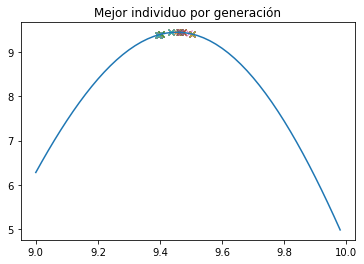

In [ ]:
# Pedimos el ingreso de los parametros necesarios
#Ejemplo de funcion con varios maximos locales: -(0.1+(1-x)**2-0.1*math.cos(6*math.pi*(1-x)))+2  intervalo de 0 a 2 (0 2)

f=input("Ingrese la funcion a optimizar (usar x como variable independiente): ")                  #Si requiere hacer uso de funciones trigonometricas por favor usar la libreria math (math.cos(x)...)
population=int(input("Ingrese el tamaño de la poblacion inicial: "))
genomSize=int(input("Ingrese el tamaño del genoma de cada individuo: "))
mutation=float(input("Ingrese la probabilidad de mutacion en porcentaje: "))
generations=int(input("Ingrese el numero de generaciones: "))
rangeList=input("Ingrese el rango de busqueda para el eje x (valores separados por un espacio): ")
rangeList=rangeList.split(" ")
rangeList= [int(i) for i in rangeList]
a,b=rangeList[0],rangeList[1]
theBest=[]
standartError=[]
cont=0

populationList=populationCreation(a,b,genomSize,population)
for j in range(generations):
  fitnessList, best, mean=fitness(populationList, f)
  populationList= des(populationList,population,fitnessList)
  mutate(a,b,populationList,mutation)
  theBest.append(best)
  if(j==0):
    lastMean = mean
    continue
  standartError.append(abs(mean-lastMean))
  lastMean=mean
print("\n"*2)
print("Mejor valor en X para la última generación: ",end="")
print(listToDecimal(populationList[np.where(fitnessList==fitnessList.max())[0][0]]))
print("Mejor valor en Y para la última generación: ",end="")
print(function(listToDecimal(populationList[np.where(fitnessList==fitnessList.max())[0][0]]),f))
print("\n")
plot(a,b,f,theBest)


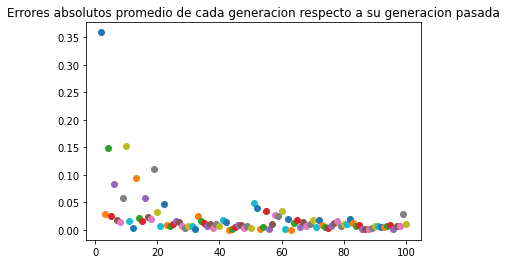

In [ ]:
cont=1
# Cada error estandar se calcula de la forma (desviacion estandar de la población, dividido en la raiz cuadrada del numero de individuos)

for i in standartError:   # graficado del error estandar a lo largo de las generaciones
  cont+=1
  plt.plot(cont,i,'o')
  plt.title('Errores absolutos promedio de cada generacion respecto a su generacion pasada')




---



# **Análisis de complejidad especifica y simplificada**
Para este caso vamos tener en cuenta los siguientes parametros de entrada:
*   Tamaño genoma de los individuos (en el código "genomSize")
*   Tamaño de la población (en el código "population")
*   Número de generaciones (en el código "generations")
*   Rango de Busqueda (En el código "a" y "b")

Lo primero que hacemos después de pedir los parametros de entrada es llamar a la función "populationCreation" en donde se creará de forma aleatoria los codigos geneticos para cada individuo de la población teniendo en cuenta el rango de busqueda $a$, $b-1$. Aquí tenemos un bucle for el cuál dependerá del valor de population y siempre llegará al final de este último por lo que tedremos una complejidad de n (siendo n el tamaño de la población). Una vez salimos de la función tenemos un for que depende del número de generaciones, por lo que tendríamos hasta el momento una complejidad de $n+m$ (siendo $m$ el número de generaciones). Aquí llamamos a la función fitness (importante tener en cuenta que estamos dentro del for con complejidad $m$) y dentro de este tenemos un bucle que depende del número de elementos de $populationList$, es decir, el tamaño de la población $n$, por lo que hasta el momento tendríamos una complejidad $n+(mn)$. Después de esto llamamos a la función "des", dentro de la cual tenemos un bucle que depende del tamaño de la población dividida entre dos $\frac{n}{2}$ por lo que tendríamos una complejidad hasta el momento de $n+(m(n+\frac{n}{2}))$. Seguido de esto llamamos a la función "mutate" y dentro de esta hay un bucle que depende nuevamente del tamaño de la población, es decir de $n$ y hay otro bucle que vamos a obviar debido a que este depende directamente de la probabilidad de mutación la cual por lo general es un número muy bajo y casi nunca entraremos aquí, por lo que decidiremos obviarlo. Hasta el momento tenemos una complejidad de        $n+(m(n+\frac{n}{2}+n))$, seguido de esto ya salimos del primer for que dependia de $m$ y llamamos a la función "plot" la cuál va a graficar tanto la función a optimizar en el intervalo dado como los mejores individuos de cada generación, de modo que la complejidad hasta el momento sería de $n+(m(n+\frac{n}{2}+n))+m+\frac{b-a}{0.02}$ y por último tendríamos la graficación de los errores estandar de cada generación, lo cual depende del número de generaciones $m$, por lo que la complejidad final nos quedaría de la siguiente forma:

> $n+(m(\frac{5n}{2}))+2m+\frac{b-a}{0.02}$

La versión simplificada nos queda de la siguiente forma:

> $O(m\cdot n)$

Con $n$ = tamaño de población, $m$ = número de generaciones



---



# Cómo influyen los parametros de configuración en el costo del algoritmo
Bueno, un primer análisis que se puede plantear es aquel que se concluye a partir de la expresión de complejidad anteriormente calculada, como podemos ver en este algoritmo los parametros que más influyen en el costo computacional son n=tamaño de la población y m=número de generaciones, lo cual mediante diferentes pruebas y experimentos con diferentes funciones se logró evidenciar practicamente que al aumentar dichos dos parámetros efectivamente el costo computacional en tiempo y espacio aumenta considerablemente. 

Un segundo aspecto de relevancia es el de la longitud del genoma, los atributos del genoma (numeros) se almacenan en una lista como eleventos individuales, es facil ver que entre más largo sea el genoma más espacio va a consumir, y en adicion tambien afectará el tiempo de ejecucion, pues en la funcion de mutuacion se recorre el genoma de cada individuo elemento a elemento.



---
# Reacción del algoritmo a diferentes tipos de funciones a optimizar
Primero que todo dar a entender que las funciones a optimizar deben tener 1 o más maximos locales para que este analisis tenga sentido, también exhibir que el objetivo de este algoritmo es precisamente hallar el valor de x dentro de un intervalo a,b en dónde su imagen f(x) sea máximo. A continuación se muestran los resultados obtenidos para funciones lineales, oscilantes y con varios maximos locales. 
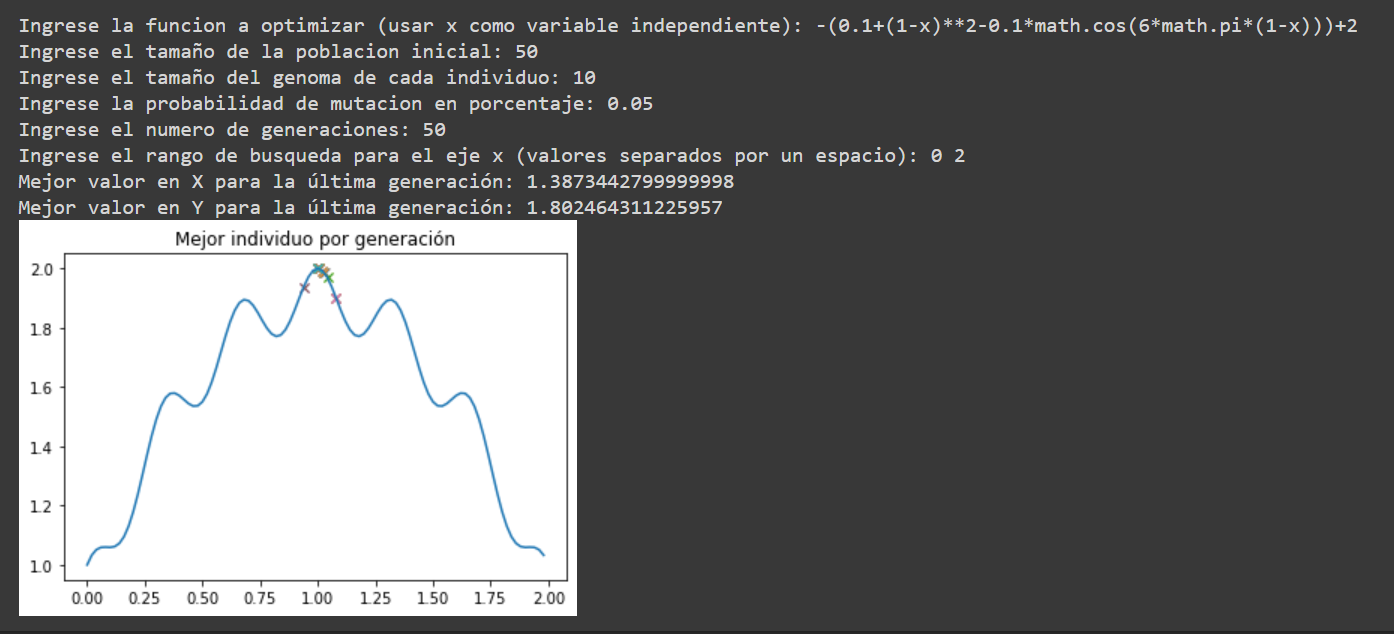

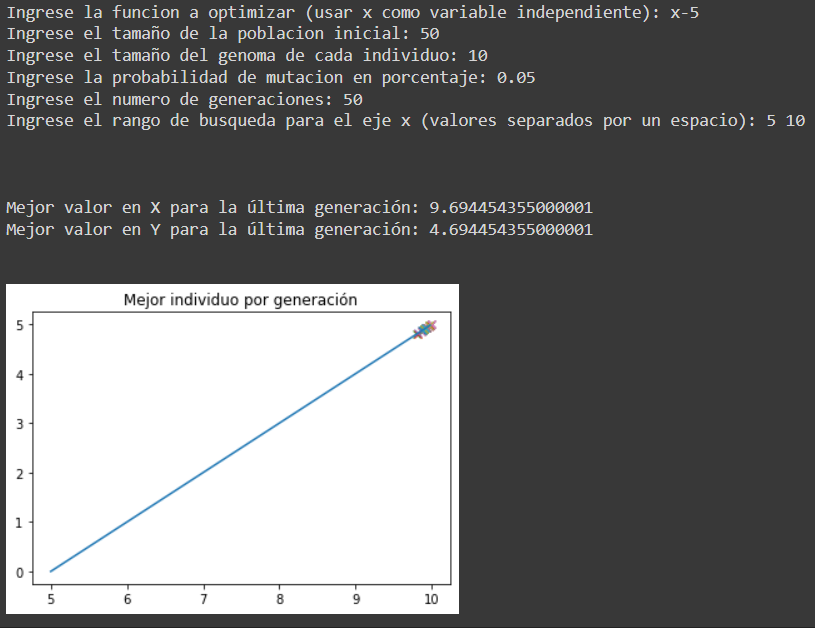

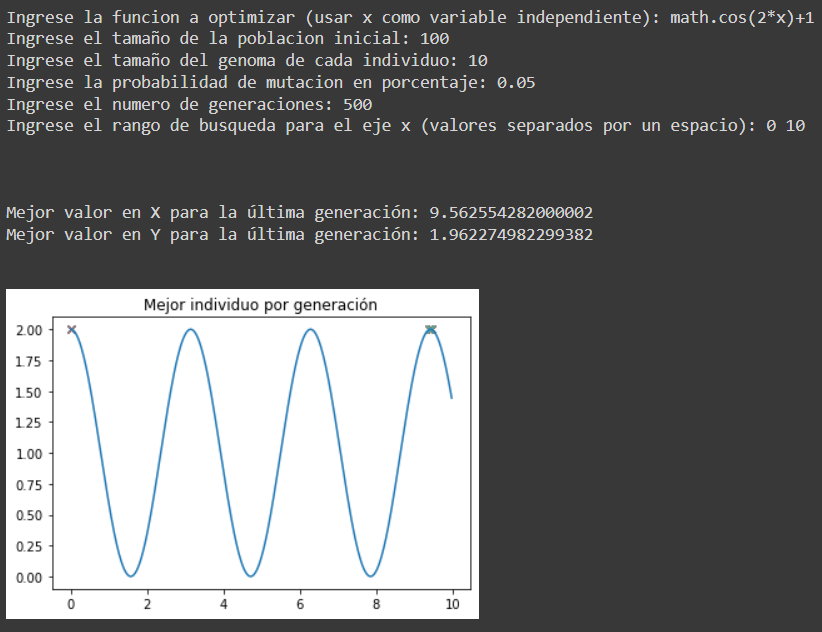

Como podemos observar en los tres ejemplos efectivamente el algoritmo cumple con su cometido de ir hallando el máximo de la función. Me gustaría hacer especial enfasis en aquellas funciones que tengan varios valores en x para el mismo valor máximo en y justo como en el tercer ejemplo, en este caso el algoritmo no se encarga de encontrar todos esos valores maximos sino que va a converger únicamente a uno al final, sin embargo es posible que algunos individuos de las primeras generaciones señalen algún otro máximo diferente al que converge al final justo como se ve en la imágen.

En los casos anteriores el algoritmo se centra en buscar el maximo de una funcion dado un rango de busqueda, esto se puede extender para encontrar el minimo de una funcion. Como dato adicional, hay que garantizar que el rango de la funcion en el intervalo de busqueda sea siempre positivo, de lo contrario el programa generaria un error ya que se basa en los valores de Y para calcular la probabilidad.



---



# Parámetro más relevante para convergencia

Se considera que el parámetro más relevante para lograr una convergencia más rápida en el modelo es **el rango de busqueda**, evidentemente, si un rango de búsqueda es lo suficientemente cercano en ambos sentidos (izquierda y derecha) con respecto al valor real del máximo a encontrar, se espera que el tiempo de convergencia sea menor; de manera análoga a algoritmos con similitudes respecto a la parametrización de un rango de búsqueda mediante un intervalo aplicado a una función.